# Neural Network Classification

##Creating Data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples=1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)



In [2]:
#check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### Vizualize data

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


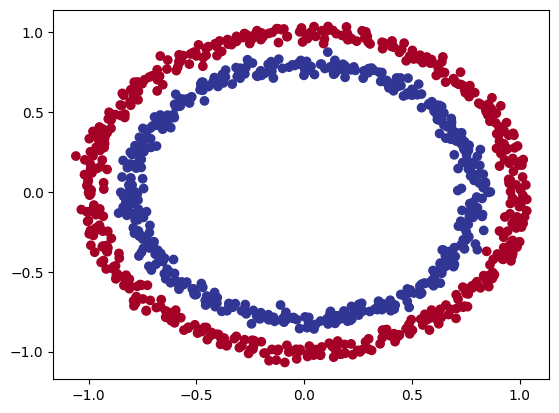

In [5]:
#Vizualize with plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
##Input and output shapes of our data

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
#first example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

## steps in modelling

1. create/import a model
2. compile the model
3. fit the model
4. evaluate the model
5. Tweak
Repeat

In [10]:
import tensorflow as tf


In [11]:

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
#                 optimizer=tf.keras.optimizers.SGD(),
#                 metrics=['accuracy'])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.9077 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.5727 - accuracy: 0.4810
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1207 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.4319 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


In [12]:
##Improving our model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)

Only 50% accuracy, which is basically guesssing

In [13]:
#Adding extra layer
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.7636 - accuracy: 0.4730
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.4930
Epoch 11/

In [14]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

##Improving the model

In [15]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 3.7221 - accuracy: 0.4610
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.8983 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7228 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4630
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 11/

50% again!!

In [16]:
##Vizualizing predictions our model is making

In [17]:
model_3.predict(X) #all sitting around 0.5

32/32 [==============================] - 0s 2ms/step


array([[0.4612988 ],
       [0.5604855 ],
       [0.56567264],
       [0.5659491 ],
       [0.41931054],
       [0.5709169 ],
       [0.54608995],
       [0.45541084],
       [0.4670504 ],
       [0.56574243],
       [0.5135096 ],
       [0.50842786],
       [0.5548043 ],
       [0.4309561 ],
       [0.42581373],
       [0.44408125],
       [0.54497784],
       [0.44811675],
       [0.55046856],
       [0.5021743 ],
       [0.48231703],
       [0.5865475 ],
       [0.44550166],
       [0.46492592],
       [0.5880497 ],
       [0.5754818 ],
       [0.5354085 ],
       [0.43473825],
       [0.43932173],
       [0.428767  ],
       [0.4708147 ],
       [0.5711699 ],
       [0.5434654 ],
       [0.43179646],
       [0.44616547],
       [0.5927097 ],
       [0.57104594],
       [0.50942683],
       [0.4401398 ],
       [0.4849478 ],
       [0.49748185],
       [0.5278611 ],
       [0.51083875],
       [0.42929223],
       [0.5245363 ],
       [0.54280233],
       [0.42597362],
       [0.528

In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  takes model, X and y
  creates meshgrid of different X values
  make preds across the meshgrid
  plot predictopns as well as aline bettween zones (where each unique class falls)
  """
  x_min, x_max= X[:,0].min()-0.1, X[:,0].max()+0.1 #0.1 is the margin
  y_min, y_max = X[:, 1].min()-0.1, X[:,1].max()+0.1
  xx, yy=np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100)
                    )

  #create x values
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #make_preds
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #reshape preds to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)


  #plot the deciison boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())






313/313 [==============================] - 1s 2ms/step
doing binary classification


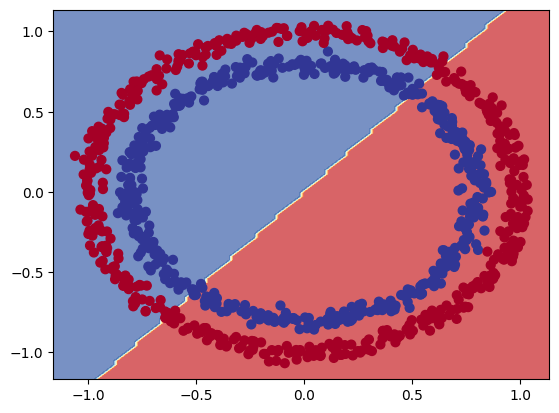

In [19]:
#check out the preds our mdoel is making
plot_decision_boundary(model_3,X, y)

In [20]:
x_min, x_max= X[:,0].min()-0.1, X[:,0].max()+0.1 #0.1 is the margin
y_min, y_max = X[:, 1].min()-0.1, X[:,1].max()+0.1
xx, yy=np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100)
                  )
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in.shape,xx.ravel()

((10000, 2),
 array([-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]))

##The missing piece-Non linearity

In [21]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.7442 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7304 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6832 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6782 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6451 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5936 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5947 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5941 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6032 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6076 - accuracy: 0.4830
Epoch 11/

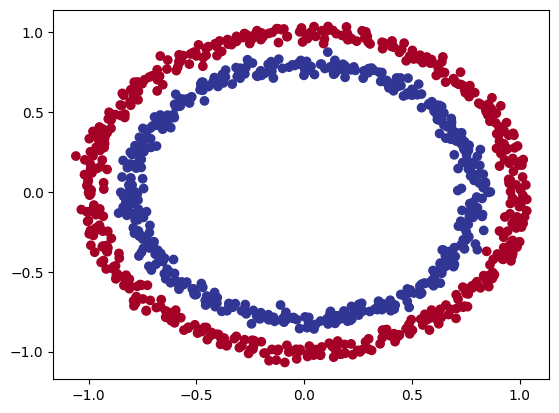

In [22]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


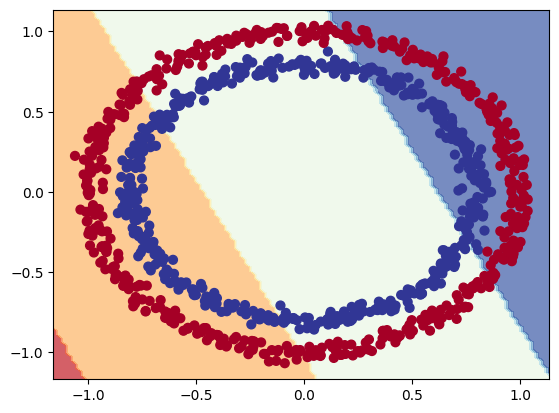

In [23]:
#check the decision boundary
plot_decision_boundary(model_4, X,y)

In [24]:
#first NN with a non-linear activation

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.2746 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.4170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.4510
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5260
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6520
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7380
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5579 - accuracy: 0.7940
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.8820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.9450
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


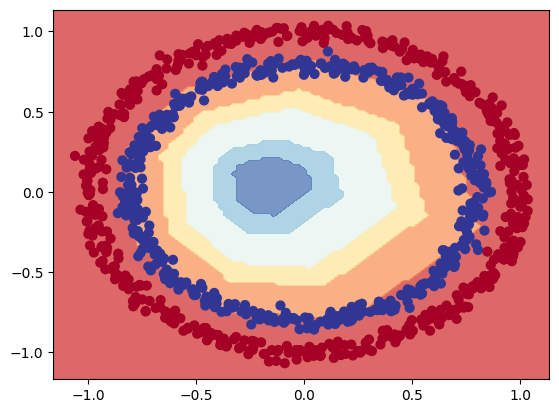

In [25]:
plot_decision_boundary(model_5, X,y)

In [26]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5070
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5390
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.7050
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.7820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.8270
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.8190
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.9160
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


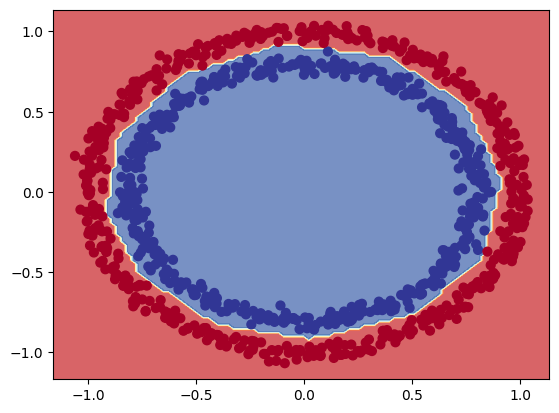

In [27]:
plot_decision_boundary(model_6, X, y)

##Understanding non-linear activations

In [28]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

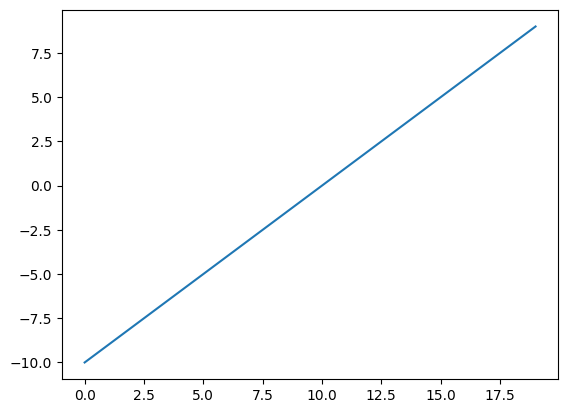

In [29]:
plt.plot(A)

### Sigmoid

In [30]:
#replicating sigmoid: 1/(1+exp(-x))

def sigmoid(x):
  return 1 /(1+tf.exp(-x))

#use sigmoid on toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

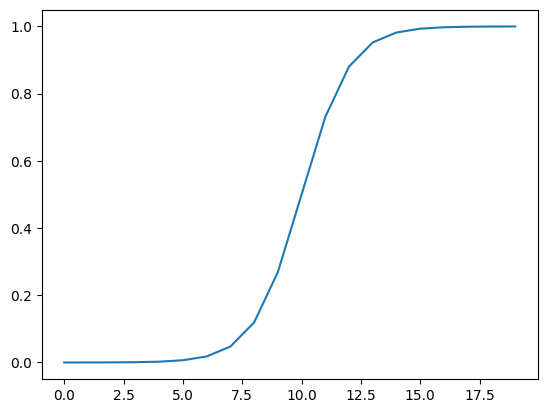

In [31]:
#plot toy tensor transfoemed by sigmoid. Note: values between 0 and 1!
plt.plot(sigmoid(A))

### Relu

In [32]:
def relu(x):
  return tf.maximum(0,x)

#passing toy tensor to relu
relu(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

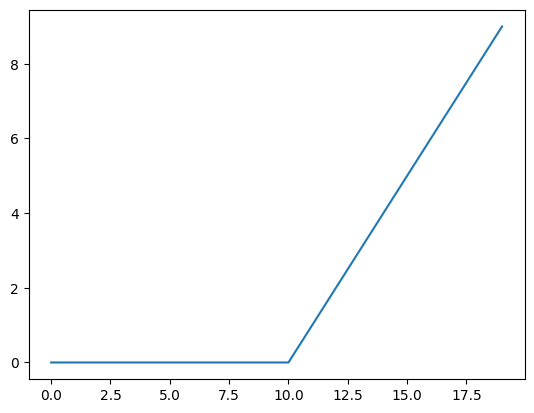

In [33]:
plt.plot(relu(A))

In [34]:
#Does the linear activation fucntion change anything??
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [35]:
tf.keras.activations.linear(A)==A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and imporving model

In [36]:
#split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

len(X_train), len(X_test)

(800, 200)

In [37]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5437
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5850
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6175
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.6087
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.6500
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7075
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7400
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7500
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7688
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.8112
Epoch 11/25
25/25 [

In [38]:
#evaluate on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9700


[0.12534692883491516, 0.9700000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


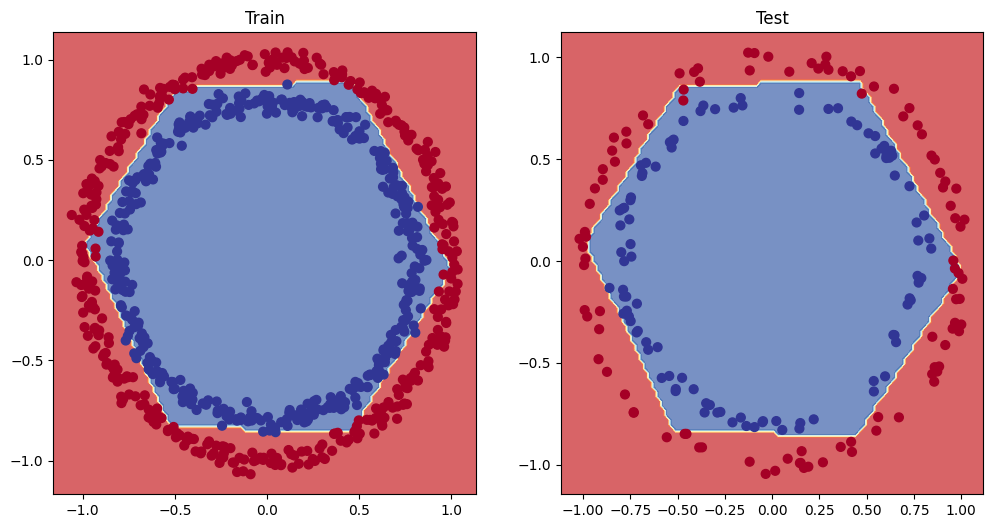

In [39]:
#plot decision boundaries for training and test dataset
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

In [40]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690404,0.54375
1,0.682390,0.58500
2,0.673154,0.61750
3,0.660844,0.60875
4,0.644205,0.65000
5,0.624171,0.70750
6,0.602245,0.74000
7,0.577936,0.75000
8,0.546591,0.76875
9,0.504346,0.81125


Text(0.5, 1.0, 'Model 8 loss curves')

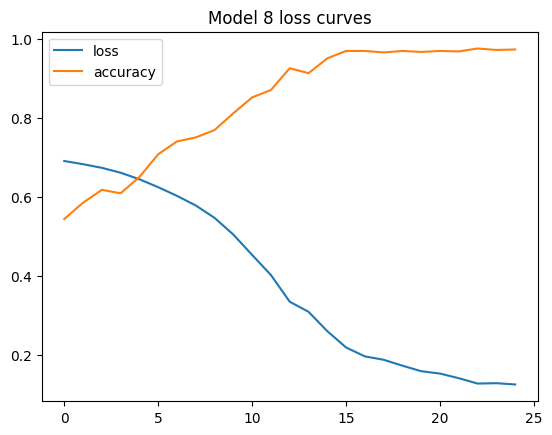

In [41]:
#plot loss curves

pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves")

ideal curve! acc improving, loss going down

## Finding the best Learning Rate

Learning rate callback (used while training)

In [42]:
tf.random.set_seed(8)
model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

#create a learning rate callback!
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 0.6983 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4875 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4850 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4863 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.4863 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

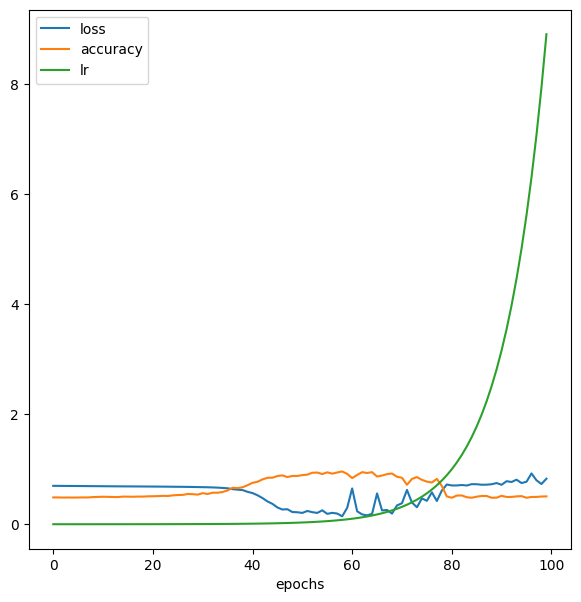

In [43]:
pd.DataFrame(history.history).plot(figsize=(7,7), xlabel="epochs")

In [44]:
#plot the learning rate vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs Loss')

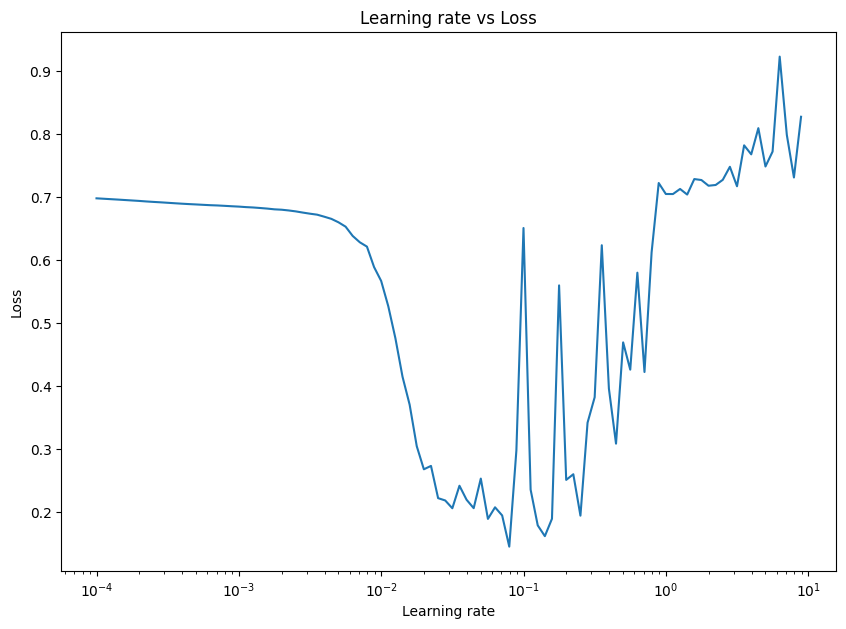

In [45]:
plt.figure(figsize=(10,7))

plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

##Note: ideal learning rate is around 10**-2, ie where loss decreases the most.

In [46]:
##Try using the ideal learning rate
tf.random.set_seed(8)
model_10= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

#create a learning rate callback!
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


history_10 = model_10.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6877 - accuracy: 0.5763
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6438
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6363
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.6800
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7487
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8175
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.9150
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9475
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9525
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9450
Epoch 11/20
25/25 [

In [47]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9750


[0.06998682022094727, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


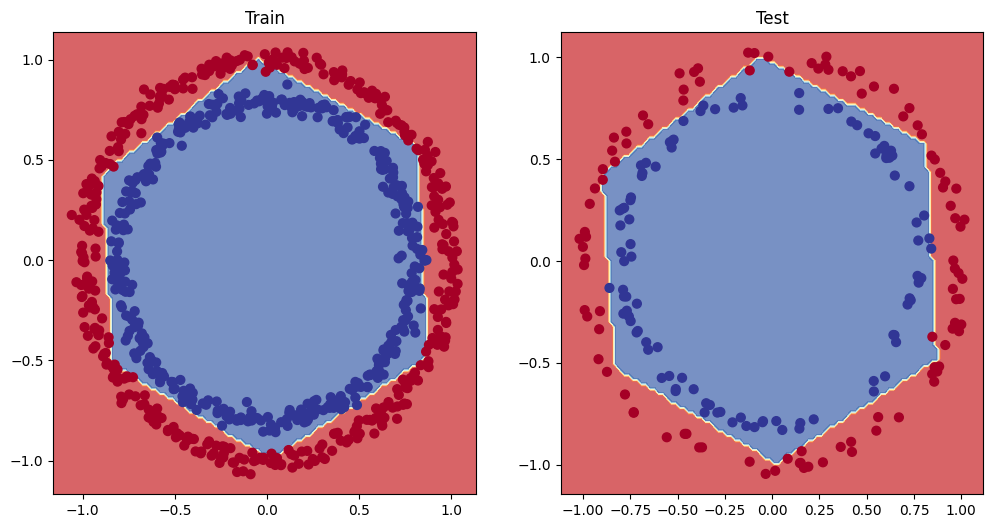

In [48]:
#plot decision boundaries for model_10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

## Classification evaluation methods

1. accuracy (not good for imbalanced classes)
2. precision (high precision leads to less false positives)
3. recall (high recall leads to less false negatives)
4. F1 score (precision-recall tradeoff)
5. Confusion matrix (useful for smaller number of classes)
6. Classification report (sklearn)

In [51]:
#check the accuracy of model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0700 - accuracy: 0.9750
Loss: 0.06998682022094727
Accuracy: 97.50%


In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

#convert y_preds to 0-1, the current y_preds is
## in "prediction_probability form", the standard output
##of sigmoid and softmax activation functions.

tf.round(y_preds)[:10]
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 7ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [54]:
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 1, 98]])

### prettify confusion matrix


In [55]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_normalized = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[0.96039604, 0.03960396],
       [0.01010101, 0.98989899]])

In [56]:
cm.astype("float")/cm.sum(axis=1)

array([[0.96039604, 0.04040404],
       [0.00990099, 0.98989899]])

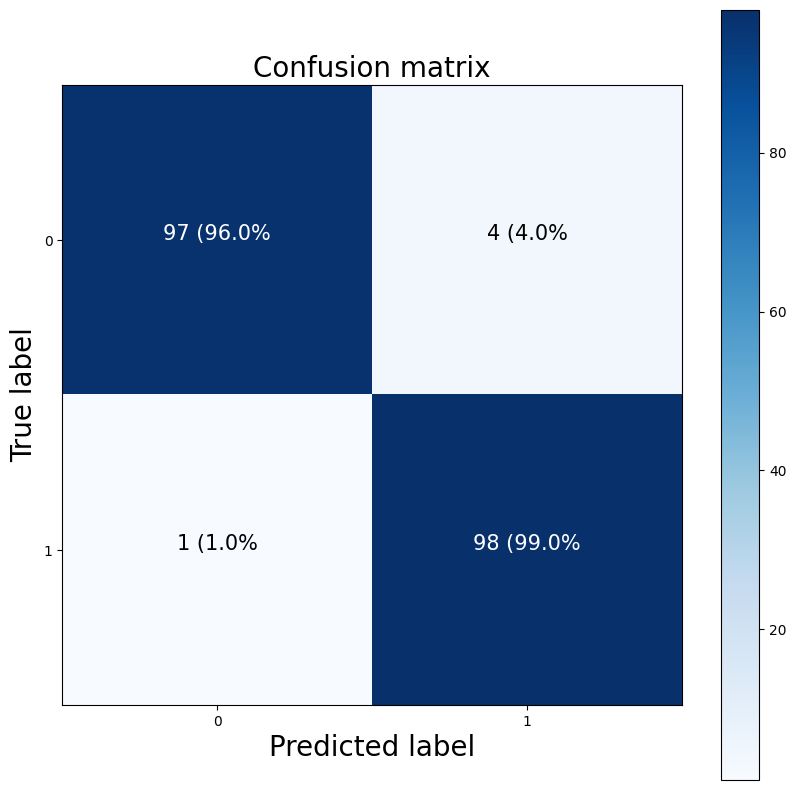

In [61]:
n_classes = cm.shape[0]

#prettify it

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


#set the threshold for different colors
threshold = (cm.max()+cm.min())/2

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_normalized[i,j]*100:.1f}%",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)





